## Übung 2

In [76]:
import pandas as pd
from pathlib import Path

def load_df(file_name: str) -> pd.DataFrame:
    """
    Load a CSV file into a pandas DataFrame.

    Args:
        file_name (str): The name of the CSV file to load.

    Returns:   
        pd.DataFrame: The loaded DataFrame.
    """
    file_path = Path.cwd() / "data" / file_name
    print(f"file_path: {file_path}")
    if not file_path.exists():
        raise FileNotFoundError(f"File not found: {file_path}")
    return pd.read_csv(file_path)

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [78]:
def pd_k_means_clustering(df: pd.DataFrame, n_clusters: int = 3, random_state: int = 42) -> KMeans:
    """
    Perform K-Means clustering on the given DataFrame and print the cluster assignments.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data to cluster.
        n_clusters (int): The number of clusters to form. Default is 3.
        random_state (int): Random seed for reproducibility. Default is 42.

    Returns:
        KMeans: The fitted KMeans model.
    """
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(df_scaled)

    return model

file_path: /Users/martin/Documents/Git/Legincy/hsbo-big-data/src/data/lilien.csv
     Kelchblattlänge(cm)  Kelchblattbreite(cm)  Blütenblattlänge(cm)  \
0                    5.1                   3.5                   1.4   
1                    4.9                   3.0                   1.4   
2                    4.7                   3.2                   1.3   
3                    4.6                   3.1                   1.5   
4                    5.0                   3.6                   1.4   
..                   ...                   ...                   ...   
145                  6.7                   3.0                   5.2   
146                  6.3                   2.5                   5.0   
147                  6.5                   3.0                   5.2   
148                  6.2                   3.4                   5.4   
149                  5.9                   3.0                   5.1   

     Blütenblattbreite(cm)       Lilienart  Cluster  


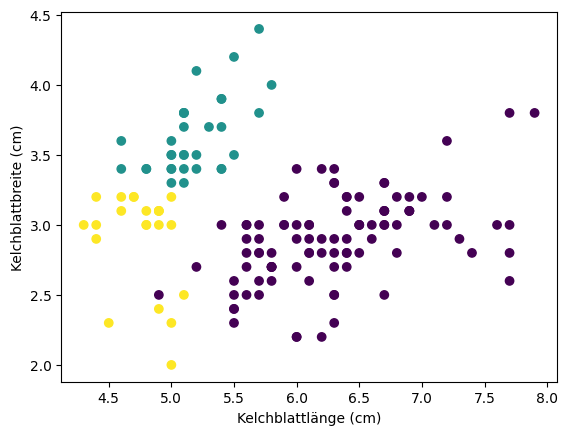

In [79]:
def clusterize_lilien() -> None:
    df = load_df("lilien.csv")
    df_dropped = df.drop(columns=["Lilienart"])

    lilien_model = pd_k_means_clustering(df_dropped, 3, 42)
    df["Cluster"] = lilien_model.labels_
    print(df)

    #Kelchblattlänge(cm),Kelchblattbreite(cm),Blütenblattlänge(cm),Blütenblattbreite(cm),Lilienart
    plt.scatter(df["Kelchblattlänge(cm)"], df["Kelchblattbreite(cm)"], c=df["Cluster"])
    plt.xlabel("Kelchblattlänge (cm)")
    plt.ylabel("Kelchblattbreite (cm)")
    plt.show()

clusterize_lilien()

file_path: /Users/martin/Documents/Git/Legincy/hsbo-big-data/src/data/customer_data.csv
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       0   35                 120                      79   
196         197       0   45                 126                      28   
197         198       1   32                 126                      74   
198         199       1   32                 137                      18   
199         200       1   30                 137                      83   


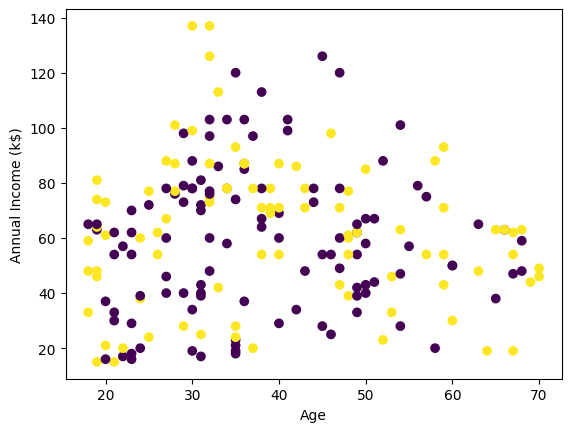

In [80]:
def clusterize_customer() -> None:
    df = load_df("customer_data.csv")
    df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
    df_dropped = df.drop(columns=["CustomerID"])

    customer_model = pd_k_means_clustering(df_dropped, 2, 42)
    df["Cluster"] = customer_model.labels_
    print(df)

    #CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
    plt.scatter(df["Age"], df["Annual Income (k$)"], c=df["Cluster"])
    plt.xlabel("Age")
    plt.ylabel("Annual Income (k$)")
    plt.show()

clusterize_customer()